# **Cyclistic | Google Data Analytics Capstone Project**
Helmy Naufal Aziz

# Intorduction
Cyclistic is a bike-share program that found in 2016; features more than 5800 bicycle and 600 docking stations across Chicago. They classify the customers into two types, customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. The director of Marketing, Lily Moreno, believes that maximizing the number of annual members will be key to future growth. She has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ. This project will be analyze how member and casual riders use bikes differently.



# Scenario
In this case study, I'm a junior data analyst working in the marketing analyst team at Cyclist. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members.

# Method Approach
This project will be analyzed in 6 steps of the analysis process:
1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act

# Step 1: Ask

## Business Task:
Analyze historical trips data from the past 12 months to identify trends and discover connections between annual members and casual riders in using bikes hourly, daily and monthly.

## Key Stakeholders:
### **1. Primary Stakeholders:**
* **Lily Moreno, Director of Marketing:** 
Responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels
* **Cyclistic Executive Team:**
The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program.

### **2. Secondary Stakeholders:**
* **Cyclistic Marketing Analytics Team:**
A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy.

# Step 2: Prepare

## Data Source:
This project uses the datasets made available by Motivate International Inc. under [license](http://ride.divvybikes.com/data-license-agreement). The datasets cover Cyclistic members' trips from September 2021 to August 2022 and are collected by downloading the zip [files](http://divvy-tripdata.s3.amazonaws.com/index.html).

The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate and will enable you to answer the business questions.

This public data can use to explore how different customer types are using Cyclistic bikes. But note that data-privacy issues prohibit us from using riders’ personally identifiable information. This means that we won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

## Collect Data
First, install and load required packages like tidyverse, lubridate, ggplot and janitor. Then, collect the datasets by assigning each month of the dataset to a data frame.

In [1]:
# Load needed packages
library(tidyverse) # for data import and wrangling
library(lubridate) # for date functions
library(ggplot2) # for data visualization
library(janitor) # for data cleaning
library(geosphere) # for distance measure
library(grid) # for arange grid
library(gridExtra) # for arrange grid
options(dplyr.summarise.inform = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# Collect datasets
trip_202109 <- read.csv("../input/cyclistic-dataset/202109-divvy-tripdata.csv")
trip_202110 <- read.csv("../input/cyclistic-dataset/202110-divvy-tripdata.csv")
trip_202111 <- read.csv("../input/cyclistic-dataset/202111-divvy-tripdata.csv")
trip_202112 <- read.csv("../input/cyclistic-dataset/202112-divvy-tripdata.csv")
trip_202201 <- read.csv("../input/cyclistic-dataset/202201-divvy-tripdata.csv")
trip_202202 <- read.csv("../input/cyclistic-dataset/202202-divvy-tripdata.csv")
trip_202203 <- read.csv("../input/cyclistic-dataset/202203-divvy-tripdata.csv")
trip_202204 <- read.csv("../input/cyclistic-dataset/202204-divvy-tripdata.csv")
trip_202205 <- read.csv("../input/cyclistic-dataset/202205-divvy-tripdata.csv")
trip_202206 <- read.csv("../input/cyclistic-dataset/202206-divvy-tripdata.csv")
trip_202207 <- read.csv("../input/cyclistic-dataset/202207-divvy-tripdata.csv")
trip_202208 <- read.csv("../input/cyclistic-dataset/202208-divvy-tripdata.csv")

# Step 3: Process
## Wrangle Data and Combine into a Single File
Comparing all the dataset to check the data integrity such as consistent columns name and data types at every file. When the data has been checked, then combine the data into a single file.

In [3]:
# Compare all the datasets
compare_df_cols(trip_202109, trip_202110, trip_202111, trip_202112, trip_202201, trip_202202, trip_202203, trip_202204, trip_202205, trip_202206, trip_202207, trip_202208)

column_name,trip_202109,trip_202110,trip_202111,trip_202112,trip_202201,trip_202202,trip_202203,trip_202204,trip_202205,trip_202206,trip_202207,trip_202208
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
end_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_lng,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_station_id,character,character,character,character,character,character,character,character,character,character,character,character
end_station_name,character,character,character,character,character,character,character,character,character,character,character,character
ended_at,character,character,character,character,character,character,character,character,character,character,character,character
member_casual,character,character,character,character,character,character,character,character,character,character,character,character
ride_id,character,character,character,character,character,character,character,character,character,character,character,character
rideable_type,character,character,character,character,character,character,character,character,character,character,character,character
start_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


In [4]:
# Combine all datasets into a single file
all_trips <- rbind(trip_202109, trip_202110, trip_202111, trip_202112, trip_202201, trip_202202, trip_202203, trip_202204, trip_202205, trip_202206, trip_202207, trip_202208)

## Clean Up Data
This step will include inspecting data structure, removing duplicates, and transforming data into a useful format.

### Inspect Data Structure

In [5]:
colnames(all_trips) # list of column names

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [6]:
dim(all_trips) # dimension of data frame

[1] 5883043      13

In [7]:
head(all_trips) # see the first 6 row of data frame

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,,,,,41.89,-87.68,41.89,-87.67,casual
2,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,,,,,41.94,-87.64,41.98,-87.67,casual
3,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,,,,,41.81,-87.72,41.80,-87.72,casual
4,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,,,,,41.80,-87.72,41.81,-87.72,casual
5,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,,,,,41.88,-87.74,41.88,-87.71,casual
6,346DE323A2677DC0,electric_bike,2021-09-28 01:53:18,2021-09-28 02:00:02,,,,,41.87,-87.75,41.88,-87.74,casual


In [8]:
str(all_trips) # see data frame structure j

'data.frame':	5883043 obs. of  13 variables:
 $ ride_id           : chr  "9DC7B962304CBFD8" "F930E2C6872D6B32" "6EF72137900BB910" "78D1DE133B3DBF55" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2021-09-28 16:07:10" "2021-09-28 14:24:51" "2021-09-28 00:20:16" "2021-09-28 14:51:17" ...
 $ ended_at          : chr  "2021-09-28 16:09:54" "2021-09-28 14:40:05" "2021-09-28 00:23:57" "2021-09-28 15:00:06" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 41.8 41.8 41.9 ...
 $ start_lng         : num  -87.7 -87.6 -87.7 -87.7 -87.7 ...
 $ end_lat           : num  41.9 42 41.8 41.8 41.9 ...
 $ end_lng           : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ member_casual     : chr  "casual" "casual" "casual" "casual" ...


Checking bike type and member type to ensure that the columns have a consistant value

In [9]:
# check bike type
unique(all_trips$rideable_type) 

[1] "electric_bike" "classic_bike"  "docked_bike"

In [10]:
# check member type
unique(all_trips$member_casual)

[1] "casual" "member"

### Remove duplicate and N/A values

In [11]:
# Remove duplicate values
all_trips <- all_trips[!duplicated(all_trips$ride_id),]

In [12]:
# Remove N/A values
all_trips <- na.omit(all_trips)

### Transform Data
This step will add some columns that list the date, month, day, and year of each ride. This will allow us to aggregate ride data for each month, day, or year.

In [13]:
all_trips$date <- as.Date(all_trips$started_at)
all_trips$hour <- format(as.POSIXct(all_trips$started_at), "%H")
all_trips$month <- format(as.Date(all_trips$date), "%b %Y")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%a")

Add a column to calcutale ride length of each member in minutes. Then convert to numeric so we can run calculations on the data.

In [14]:
# add ride_length column
all_trips$ride_length <- difftime(all_trips$ended_at, all_trips$started_at, units = "mins")
# convert ride_length to numeric
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

In [15]:
# see the average ride time by each day for each users
aggregate(all_trips$ride_length ~ all_trips$member_casual + all_trips$day_of_week, FUN = mean)

all_trips$member_casual,all_trips$day_of_week,all_trips$ride_length
<chr>,<chr>,<dbl>
casual,Fri,22.15744
member,Fri,12.34016
casual,Mon,24.50516
member,Mon,12.21616
casual,Sat,26.33422
member,Sat,14.01618
casual,Sun,27.57543
member,Sun,14.04167
casual,Thu,21.10157


Notice that the days of the week are out of order. Fix this by ordering the days of the week also the month.

In [16]:
# ordering day of week and month
all_trips$day_of_week <- ordered(all_trips$day_of_week, levels=c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))
all_trips$month <- ordered(all_trips$month, levels=c( "Sep 2021", "Oct 2021", "Nov 2021", "Dec 2021", "Jan 2022", "Feb 2022", "Mar 2022", "Apr 2022", "May 2022", "Jun 2022", "Jul 2022", "Aug 2022"))

In [17]:
# measure the distance
all_trips$distance <- distGeo(matrix(c(all_trips$start_lng, all_trips$start_lat), ncol=2), matrix(c(all_trips$end_lng, all_trips$end_lat), ncol=2)) / 1000

In [18]:
summary(all_trips) # statistical summary of data

   ride_id          rideable_type       started_at          ended_at        
 Length:5877316     Length:5877316     Length:5877316     Length:5877316    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5877316     Length:5877316     Length:5877316     Length:5877316    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

As we see above, the dataframe includes entries where ride_length was negative. Filter the datasets to remove the negative values.

In [19]:
# assign filtered dataframe
all_trips <- filter(all_trips, ride_length>0)

In [20]:
head(all_trips)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,end_lng,member_casual,date,hour,month,day,year,day_of_week,ride_length,distance
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<date>,<chr>,<ord>,<chr>,<chr>,<ord>,<dbl>,<dbl>
1,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,,,,,41.89,-87.68,⋯,-87.67,casual,2021-09-28,16,Sep 2021,28,2021,Tue,2.733333,0.829933
2,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,,,,,41.94,-87.64,⋯,-87.67,casual,2021-09-28,14,Sep 2021,28,2021,Tue,15.233333,5.091652
3,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,,,,,41.81,-87.72,⋯,-87.72,casual,2021-09-28,00,Sep 2021,28,2021,Tue,3.683333,1.110695
4,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,,,,,41.80,-87.72,⋯,-87.72,casual,2021-09-28,14,Sep 2021,28,2021,Tue,8.816667,1.110695
5,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,,,,,41.88,-87.74,⋯,-87.71,casual,2021-09-28,09,Sep 2021,28,2021,Tue,10.533333,2.490187
6,346DE323A2677DC0,electric_bike,2021-09-28 01:53:18,2021-09-28 02:00:02,,,,,41.87,-87.75,⋯,-87.74,casual,2021-09-28,01,Sep 2021,28,2021,Tue,6.733333,1.386645


# Step 4: Analyze
After we get the clean data, we will compare member and casual users using some variables to get insight and identify the trends. The variables include:
* Number of rides
* Prefered bike type
* Ride length
* Ride distance
* Popular station

## Number of Rides by User Type
First, we count how many rides in the last 12 months then compare to get number of rides of each user type.

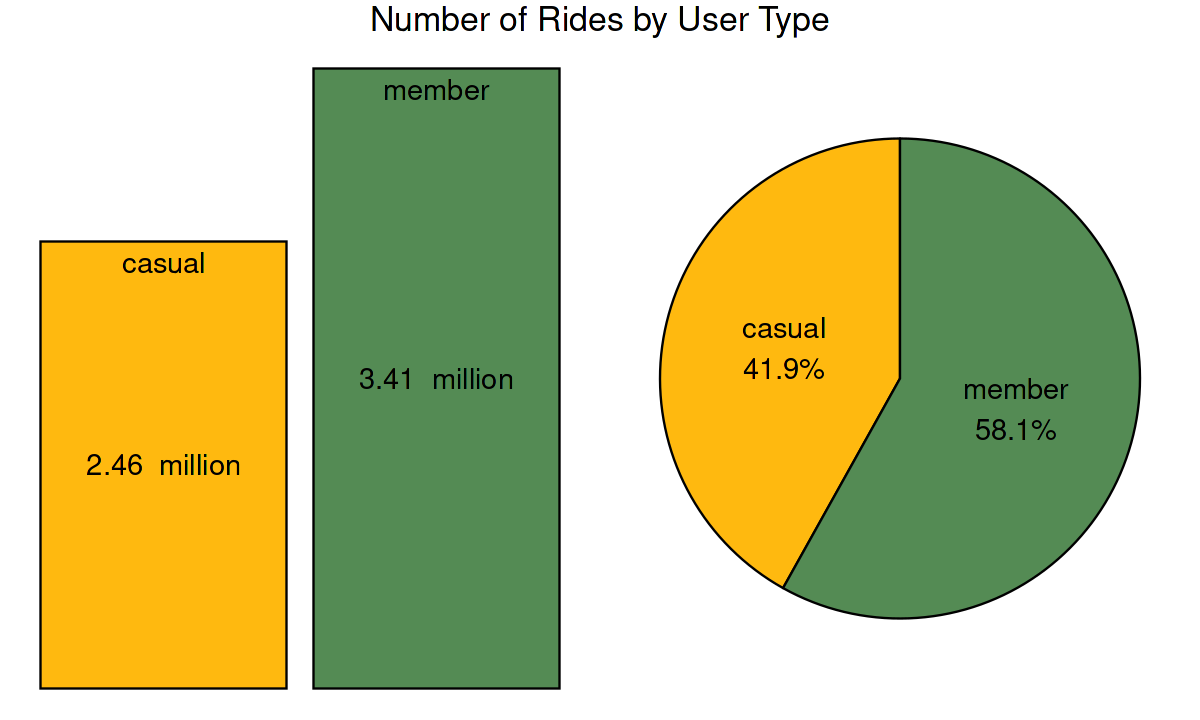

In [21]:
options(repr.plot.width = 10, repr.plot.height = 6)
pie_user <- all_trips %>%
    group_by(member_casual) %>%
    summarise(num_users = n(), percentage = round(num_users / nrow(all_trips) *100, digit=1)) %>%
    ggplot(aes(x="", y=percentage, fill=member_casual)) + 
    geom_col(color="black") + 
    coord_polar(theta = "y") +
    geom_text(aes(label = paste(member_casual, paste(percentage,"%", sep=""), sep="\n")),size = 6, position = position_stack(vjust=0.5)) +
    theme_void() +
    theme(legend.position = "none") +
    scale_fill_manual(values = c("darkgoldenrod1", "palegreen4"))

bar_user <- all_trips %>%
    group_by(member_casual) %>%
    summarize(num_users = round(n()/1000000,2)) %>%
    ggplot(aes(x=member_casual, y=num_users, fill=member_casual)) +
    geom_col(color = "black") +
    geom_text(aes(label = paste(num_users," million")),size = 6, position = position_stack(vjust=0.5)) +
    theme_void() +
    geom_text(aes(label = member_casual),size = 6, vjust=1.5) +
    theme(legend.position = "none") +
    scale_fill_manual(values = c("darkgoldenrod1", "palegreen4"))


grid.arrange(bar_user, pie_user, ncol=2, top= textGrob("Number of Rides by User Type", gp = gpar(fontsize = 20)))

* Annual members have most trips in the past 12 months

## Preferred Bike Type
 The company has 3 kinds of bike types. We want to know which bike is preferred by the users.

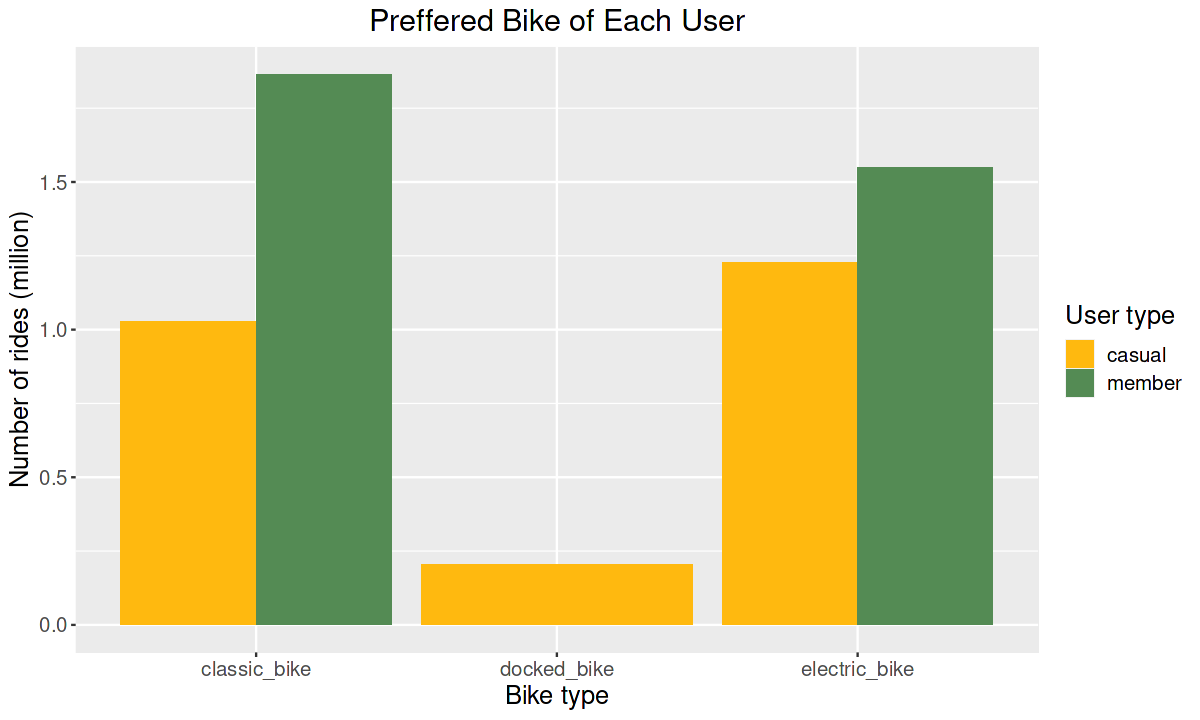

In [22]:
options(repr.plot.width = 10, repr.plot.height = 6)
all_trips %>%
    group_by(rideable_type, member_casual) %>%
    summarize(num_user=n()) %>%
    ggplot(aes(x=rideable_type,y=num_user/1000000,fill=member_casual)) +
    geom_col(position = "dodge") +
    labs(title = "Preffered Bike of Each User", x="Bike type", y="Number of rides (million)") +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15)) +
    guides(fill = guide_legend(title = "User type")) +
    scale_fill_manual(values = c("darkgoldenrod1", "palegreen4"))

* Casual members prefer to ride the electric bike most, followed by the classic bike and then docked bike.
* Annual members prefer to ride the classic bike more than an electric bike, but no one uses a docked bike.

## Number of Rides by Hour, Day and Month
Comparing the number of rides by hour, day and month to understand the trends.

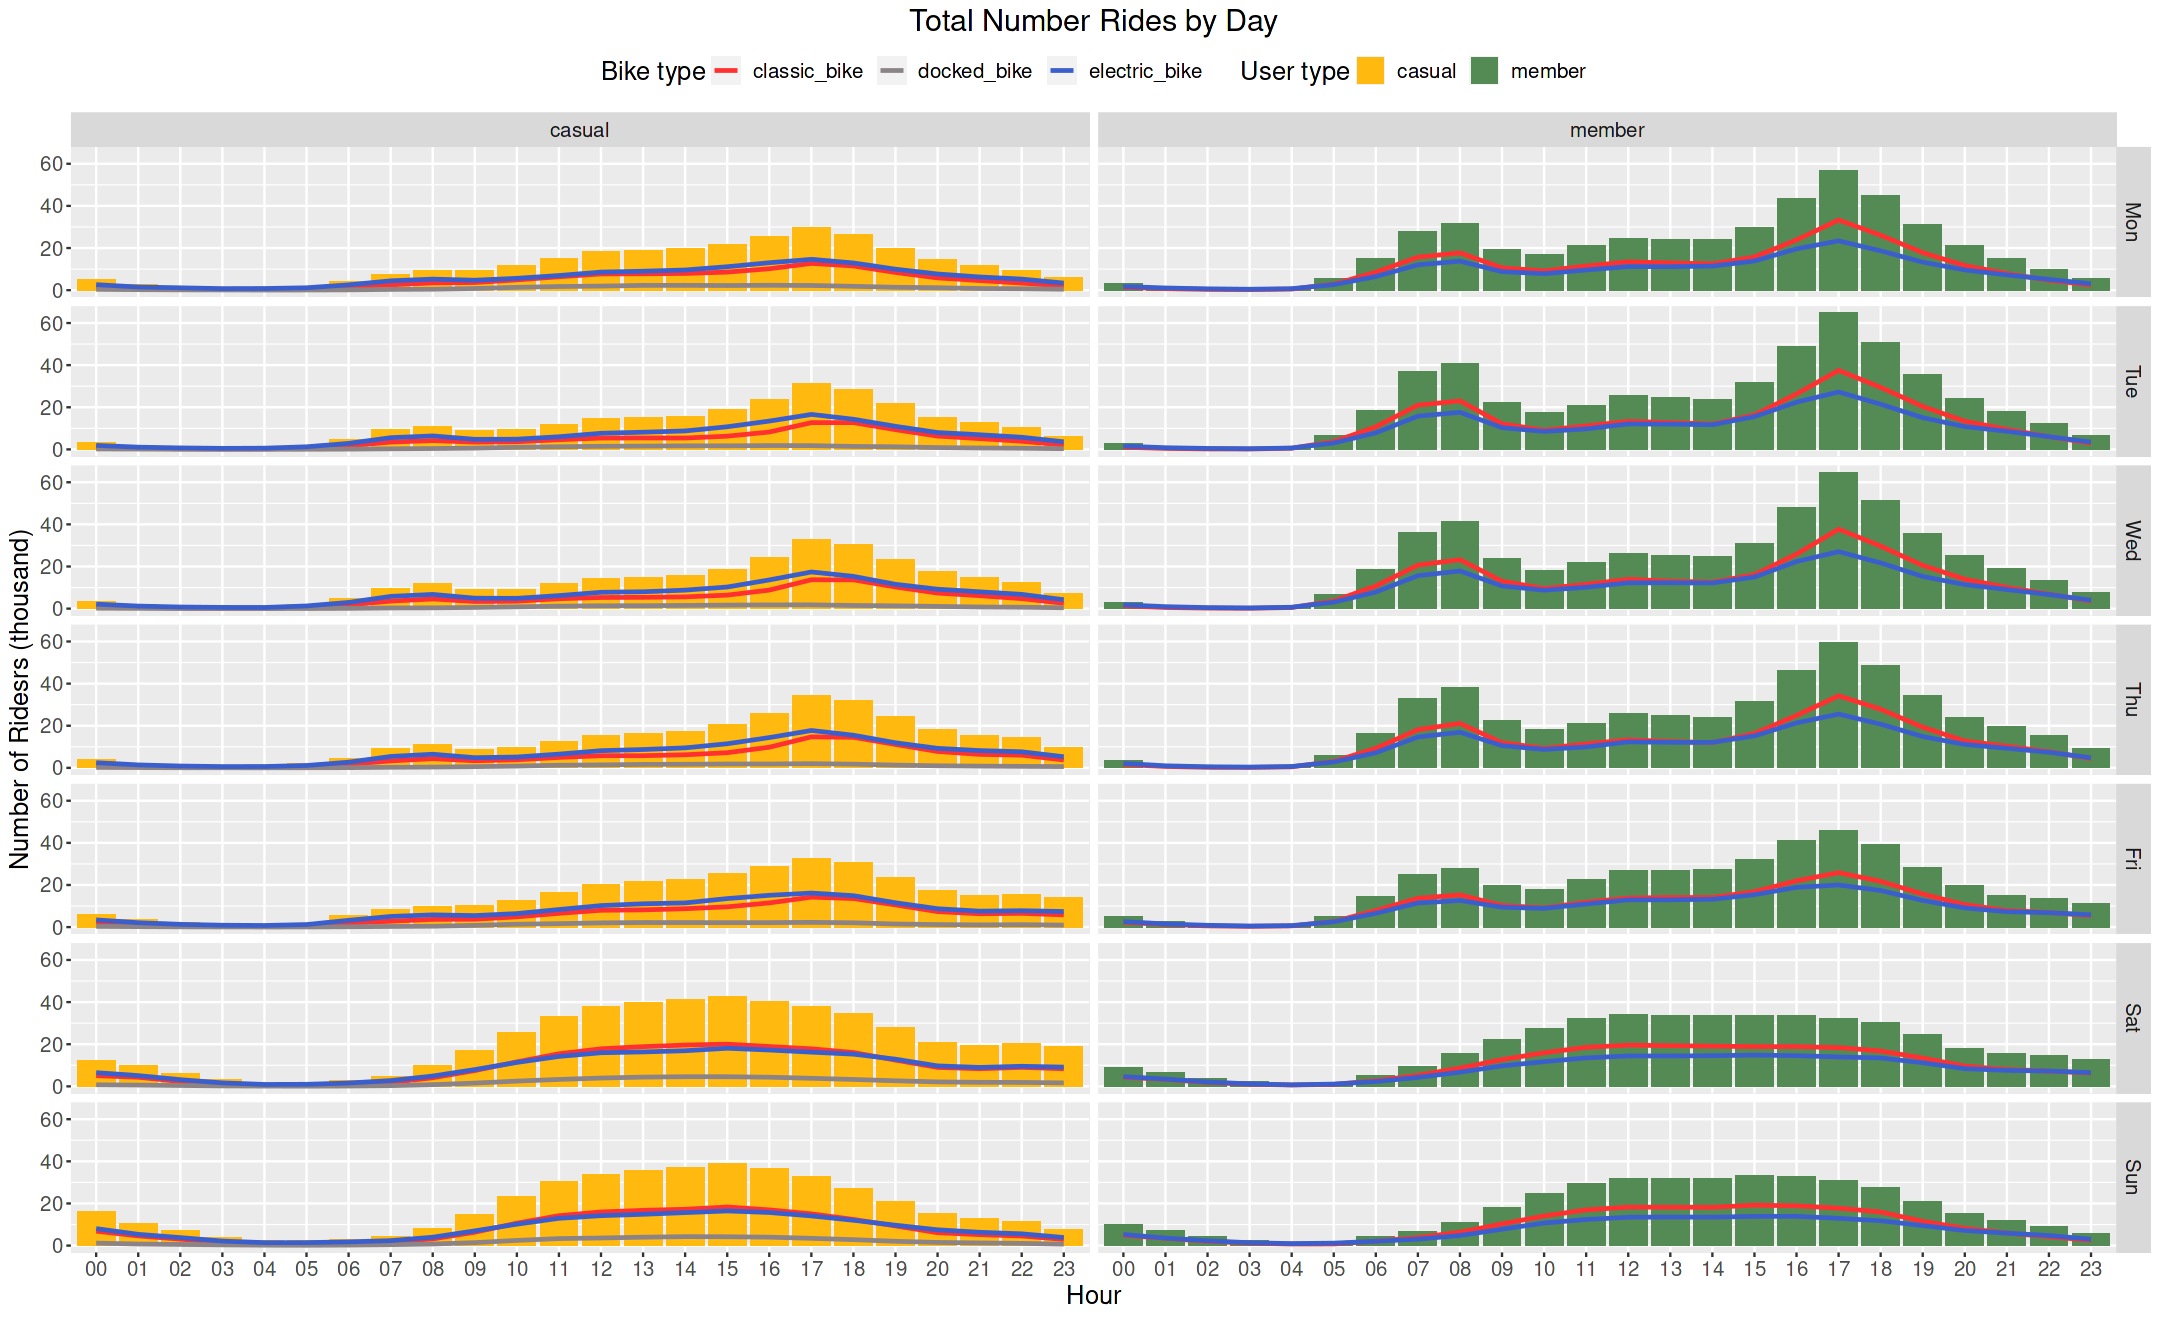

In [23]:
options(repr.plot.width = 18, repr.plot.height = 11 )
all_trips %>%
    group_by(member_casual, day_of_week, hour, rideable_type) %>%
    summarise(ride=n()/1000) %>%
    ggplot(aes(x=hour, y=ride, fill=member_casual)) +
    geom_col() + 
    geom_line(aes(color=rideable_type, group=rideable_type), size=1) +
    facet_grid(~day_of_week~member_casual) +
    labs(title = "Total Number Rides by Day", x="Hour", y="Number of Ridesrs (thousand)", fill= "User type", colour="Bike type") +
    scale_fill_manual(values = c("darkgoldenrod1", "palegreen4")) +
    scale_color_manual(values=c("firebrick1", "lavenderblush4", "royalblue3")) +
#     guides(fill = guide_legend(title = "User type")) +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15), legend.position = "top")

* The peak time for casual users is from 17:00 - 18:00
* The peak time for the annual users is from 08:00 - 09:00 and 16:00 - 18:00
* Weekends will be the busiest days for both users and will be peaking at 10:00 - 18:00

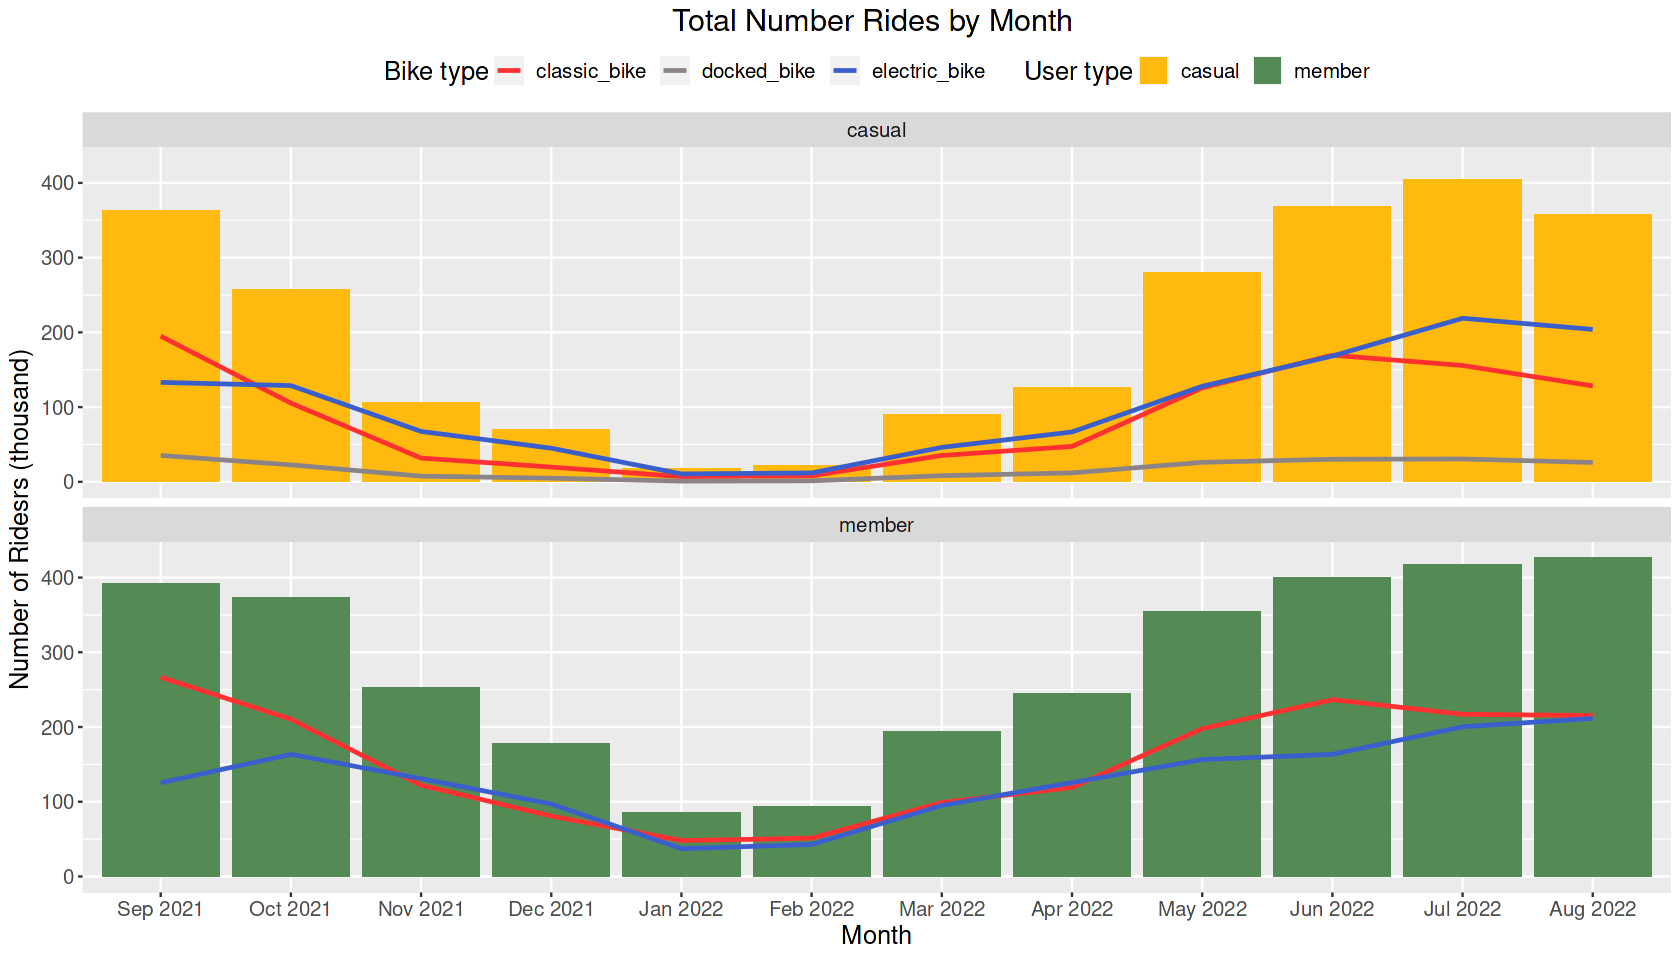

In [24]:
options(repr.plot.width = 14, repr.plot.height = 8 )
all_trips %>%
    group_by(member_casual, month, rideable_type) %>%
    summarise(ride=n()/1000) %>%
    ggplot(aes(x=month, y=ride, fill=member_casual)) +
    geom_col() + 
    geom_line(aes(color=rideable_type, group=rideable_type), size=1) +
    facet_wrap(~member_casual, ncol=1) +
    labs(title = "Total Number Rides by Month ", x="Month", y="Number of Ridesrs (thousand)", fill= "User type", colour="Bike type") +
    scale_fill_manual(values = c("darkgoldenrod1", "palegreen4")) +
    scale_color_manual(values=c("firebrick1", "lavenderblush4", "royalblue3")) +
#     guides(fill = guide_legend(title = "User type")) +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15), legend.position = "top")

* For annual members, the electric bikes are used more than classic bikes during the winter months (November - December)
* Overall bike usage will increase during mid-year and will be peaking in July - August
* Number of rides drops during the winter months

## Average Ride Length

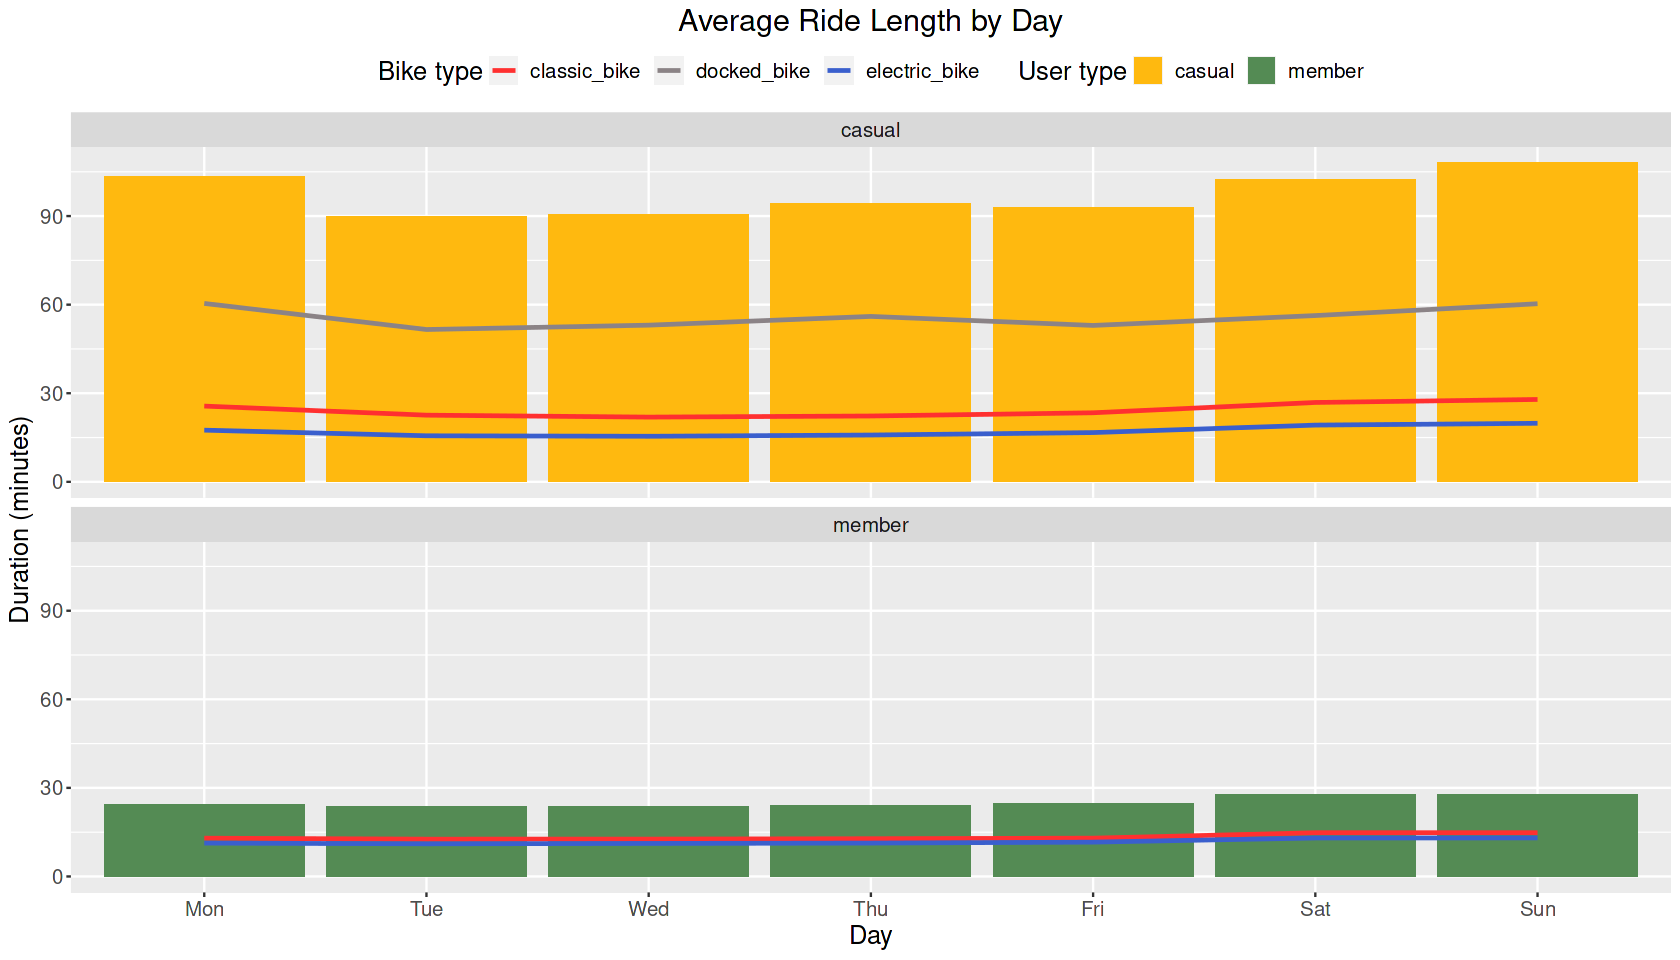

In [25]:
options(repr.plot.width = 14, repr.plot.height = 8 )
all_trips %>%
    group_by(member_casual, day_of_week, rideable_type) %>%
    summarise(ride=mean(ride_length)) %>%
    ggplot(aes(x=day_of_week, y=ride, fill=member_casual)) +
    geom_col() + 
    geom_line(aes(color=rideable_type, group=rideable_type), size=1) +
    facet_wrap(~member_casual,ncol=1) +
    labs(title = "Average Ride Length by Day", x="Day", y="Duration (minutes)", fill= "User type", colour="Bike type") +
#     geom_text(aes(label = sum(ride)),size = 6, vjust=1.5) +
    scale_fill_manual(values = c("darkgoldenrod1", "palegreen4")) +
    scale_color_manual(values=c("firebrick1", "lavenderblush4", "royalblue3")) +
#     guides(fill = guide_legend(title = "User type")) +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15), legend.position = "top")

* For casual users, the average ride length is around 90 minutes a day and will be peaking on Sunday
* Docked bikes have the most average length of 60 minutes followed by classic bikes and electric bikes.
* For annual members, the average ride length is less than 30 minutes each day and relatively consistent during the week.

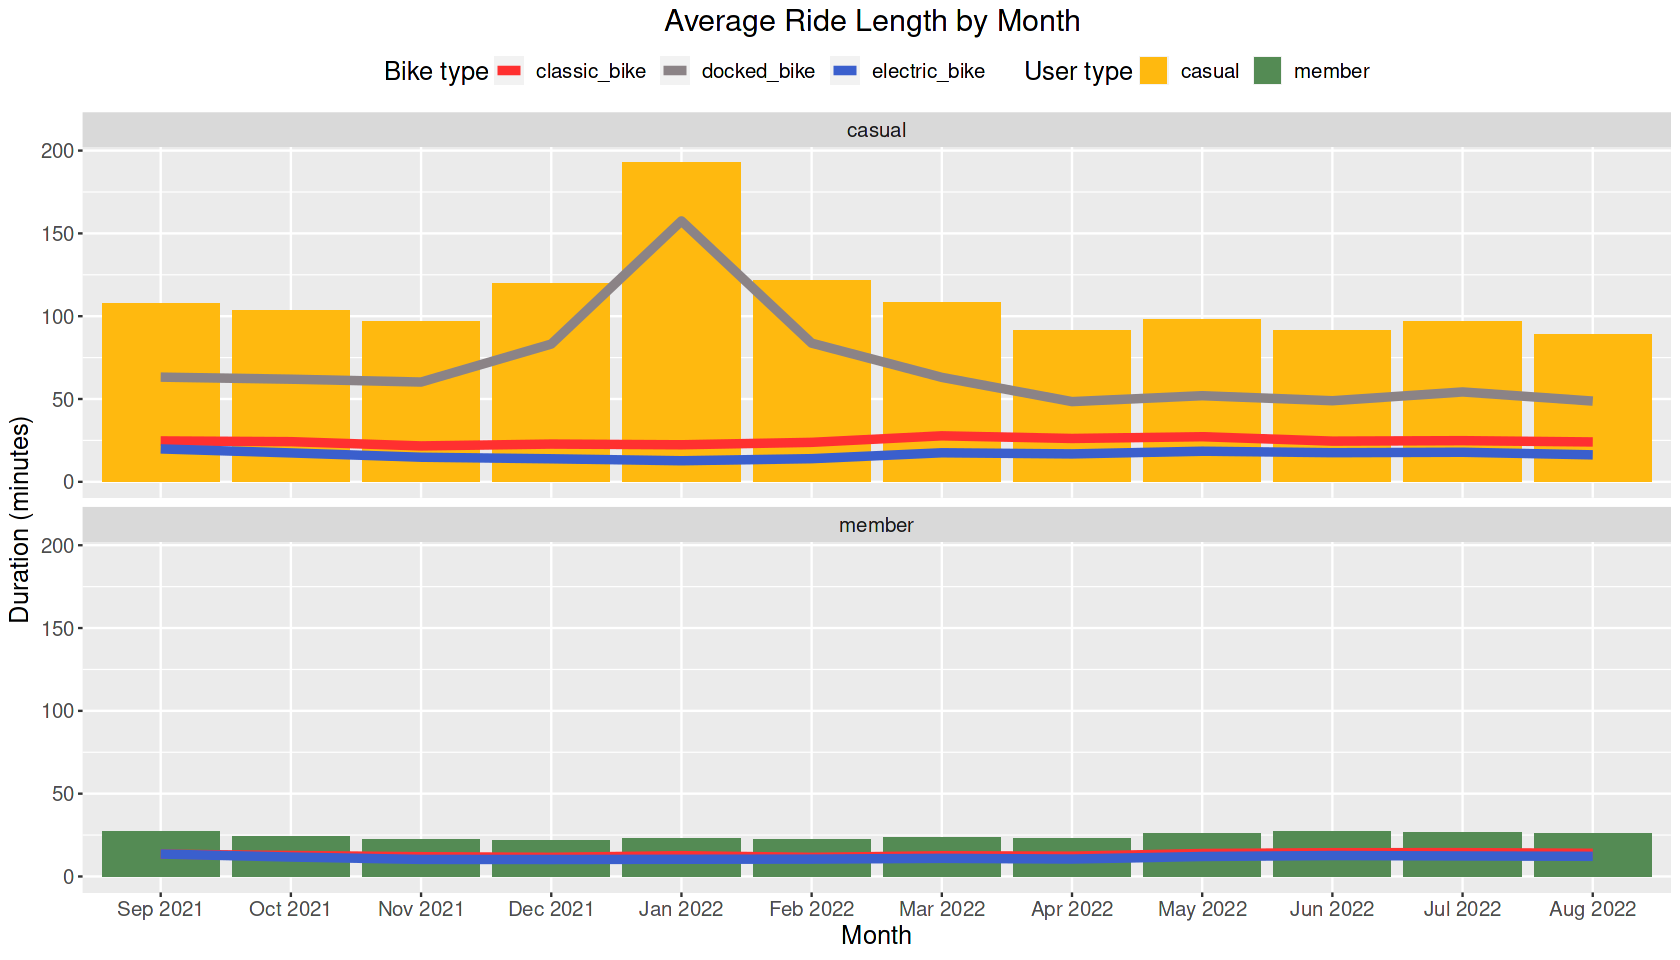

In [26]:
options(repr.plot.width = 14, repr.plot.height = 8 )
all_trips %>%
    group_by(member_casual, month, rideable_type) %>%
    summarise(ride=mean(ride_length)) %>%
    ggplot(aes(x=month, y=ride, fill=member_casual)) +
    geom_col() + 
    geom_line(aes(color=rideable_type, group=rideable_type), size=2) +
    facet_wrap(~member_casual, ncol=1) +
    labs(title = "Average Ride Length by Month ", x="Month", y="Duration (minutes)", fill= "User type", colour="Bike type") +
    scale_fill_manual(values = c("darkgoldenrod1", "palegreen4")) +
    scale_color_manual(values=c("firebrick1", "lavenderblush4", "royalblue3")) +
#     guides(fill = guide_legend(title = "User type")) +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15), legend.position = "top")

* For casual members, the average ride length during the last 12 months is around 100 minutes a month.
* The ride length has significantly increased during January by almost 50 percent due to docked bike usage increases.
* Docked bikes have the most average ride length followed by classic and electric bikes.
* The average ride length of an annual membership is around 25 minutes a month during the last 12 months.

## Average Ride Distance

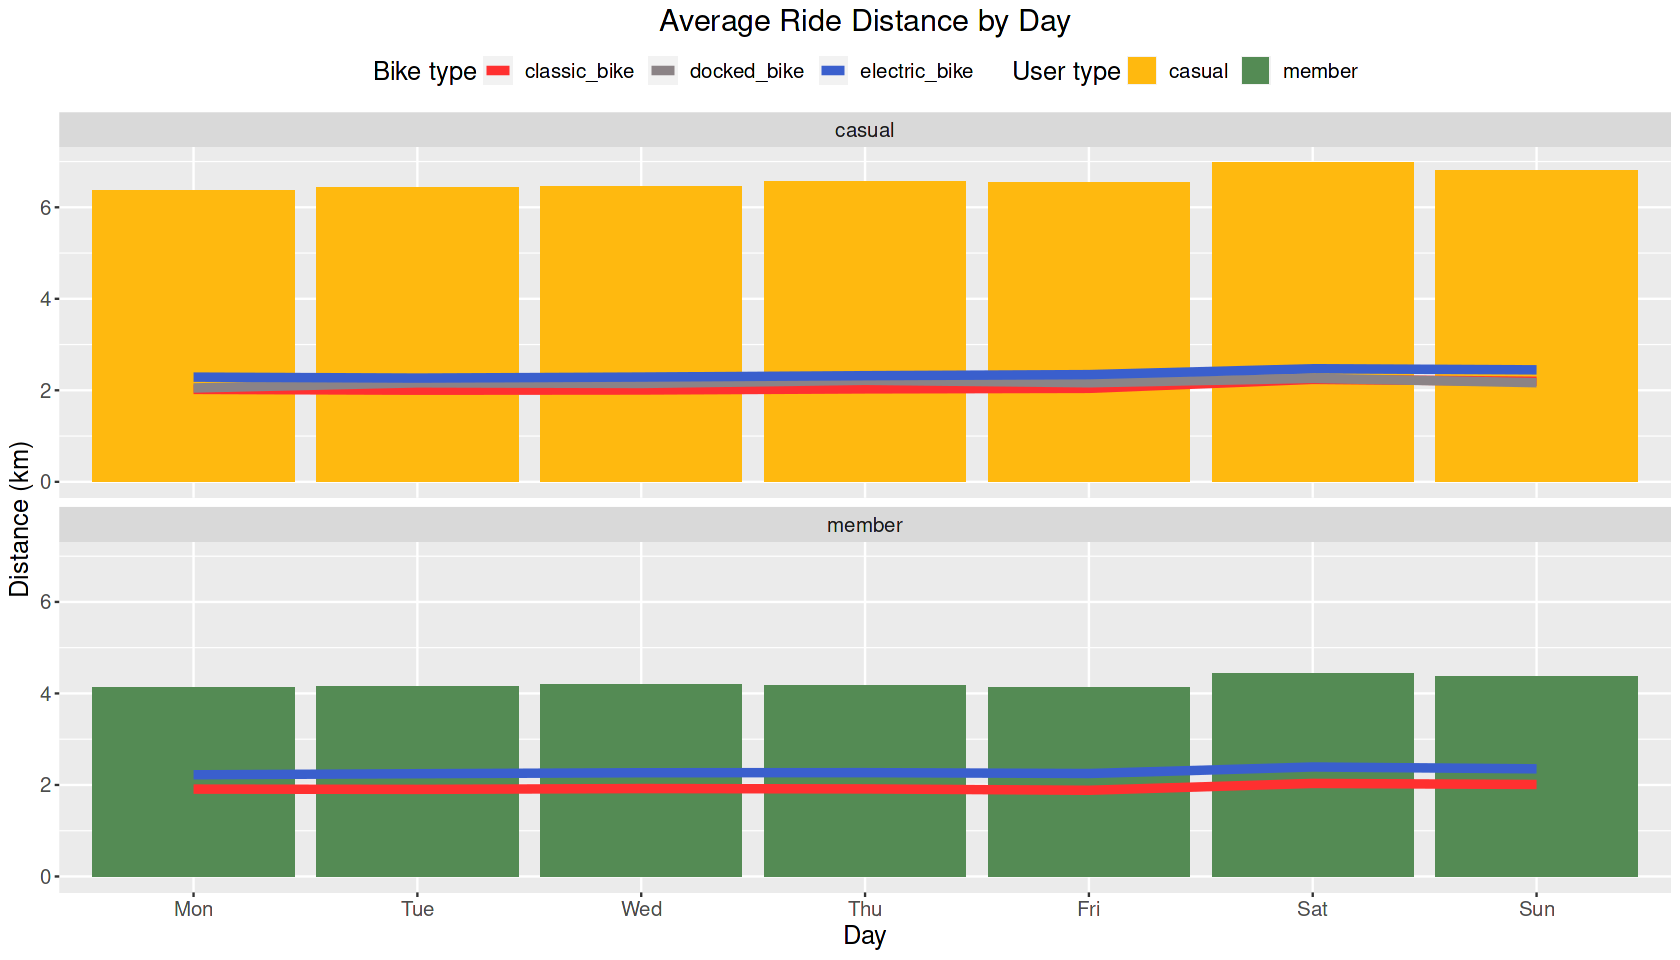

In [27]:
options(repr.plot.width = 14, repr.plot.height = 8 )
all_trips %>%
    group_by(member_casual, day_of_week, rideable_type) %>%
    summarise(ride=mean(distance)) %>%
    ggplot(aes(x=day_of_week, y=ride, fill=member_casual)) +
    geom_col() + 
    geom_line(aes(color=rideable_type, group=rideable_type), size=2) +
    facet_wrap(~member_casual,ncol=1) +
    labs(title = "Average Ride Distance by Day", x="Day", y="Distance (km)", fill= "User type", colour="Bike type") +
    scale_fill_manual(values = c("darkgoldenrod1", "palegreen4")) +
    scale_color_manual(values=c("firebrick1", "lavenderblush4", "royalblue3")) +
#     guides(fill = guide_legend(title = "User type")) +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15), legend.position = "top")

* Casual users have more average distance than annual members.
* Overall average distance is relatively constant during a week with slight increases on weekends.
* Electric bikes used by annual members have more average distance.

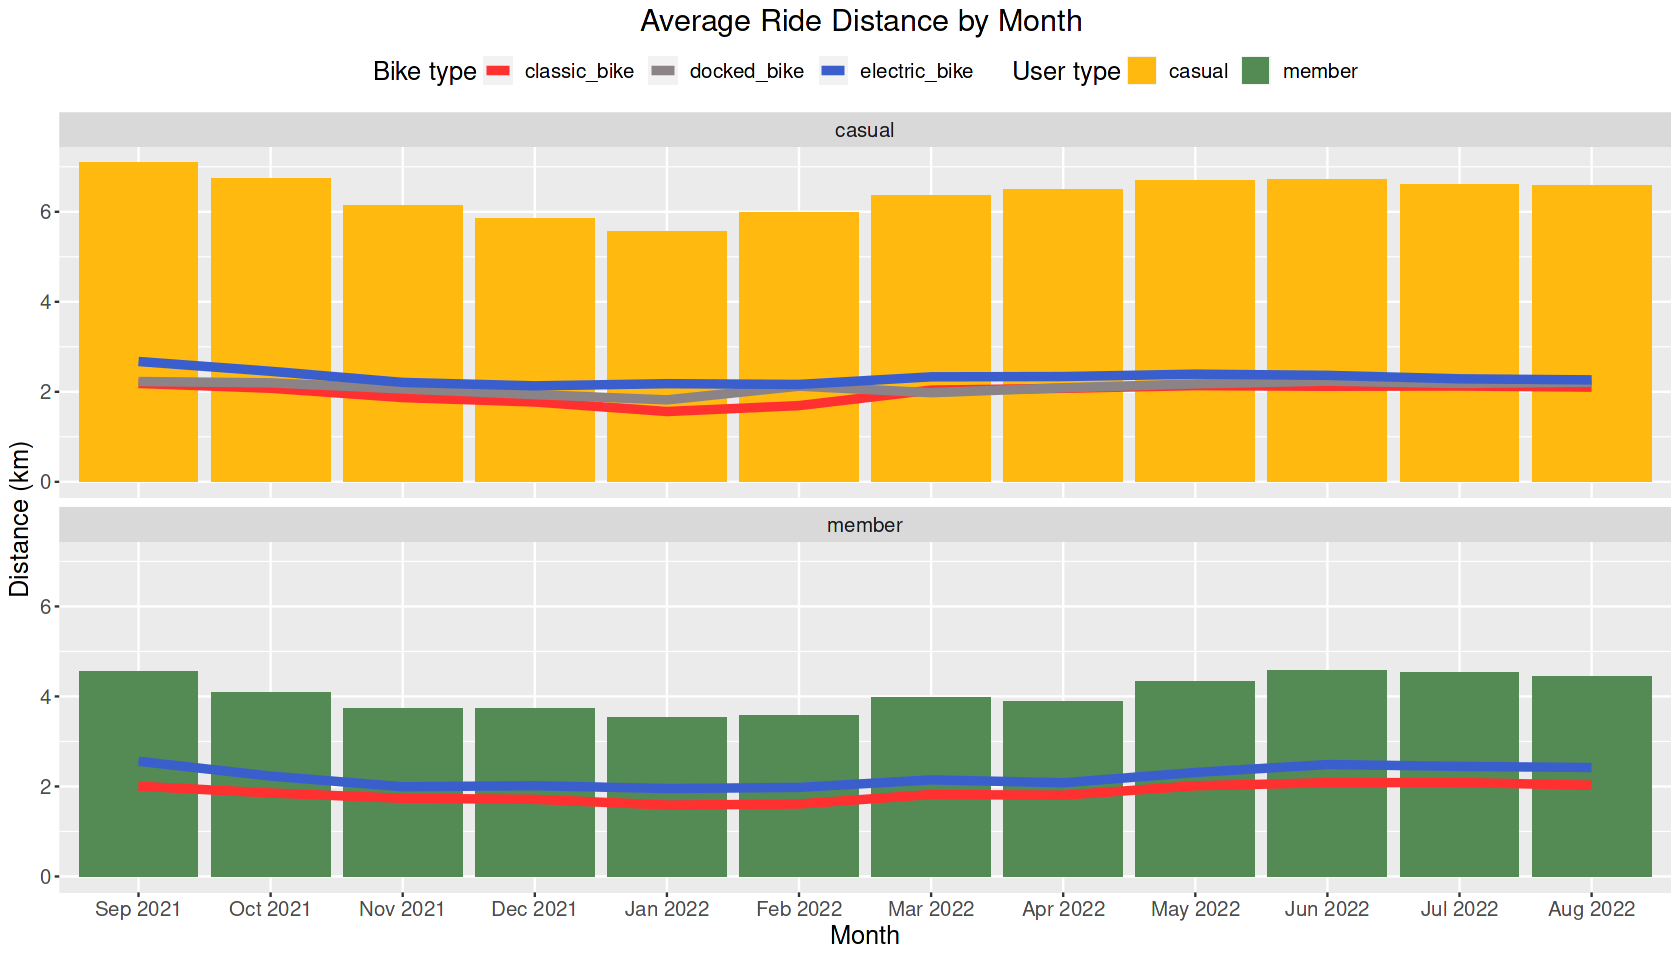

In [28]:
options(repr.plot.width = 14, repr.plot.height = 8 )
all_trips %>%
    group_by(member_casual, month, rideable_type) %>%
    summarise(ride=mean(distance)) %>%
    ggplot(aes(x=month, y=ride, fill=member_casual)) +
    geom_col() + 
    geom_line(aes(color=rideable_type, group=rideable_type), size=2) +
    facet_wrap(~member_casual, ncol=1) +
    labs(title = "Average Ride Distance by Month ", x="Month", y="Distance (km)", fill= "User type", colour="Bike type") +
    scale_fill_manual(values = c("darkgoldenrod1", "palegreen4")) +
    scale_color_manual(values=c("firebrick1", "lavenderblush4", "royalblue3")) +
#     guides(fill = guide_legend(title = "User type")) +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 15), legend.position = "top")

* Casual users have more average distance than annual members.
* Overall average distance tends to decrease during the winter month.
* Electric bikes used by annual members have more average distance.

## Top 10 Most Busiest Station

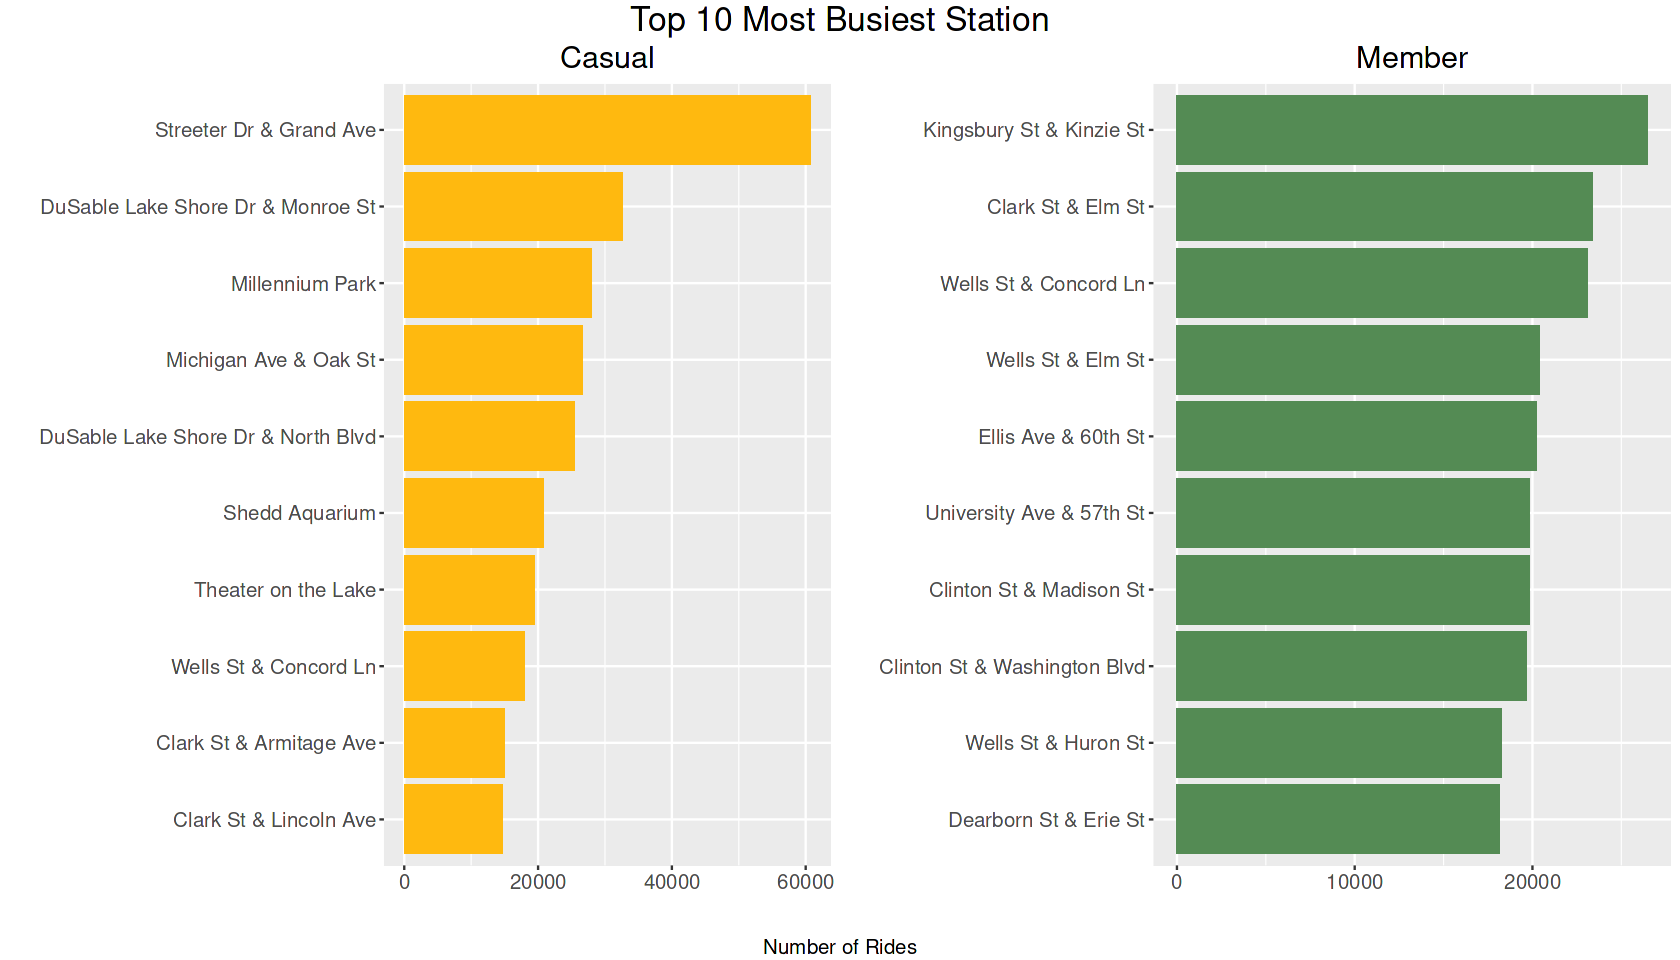

In [29]:
options(repr.plot.width = 14, repr.plot.height = 8)
casual_station <- all_trips %>%
    group_by(member_casual, start_station_name) %>%
    filter(start_station_name != "" & member_casual == "casual") %>%
    summarize(ride=n()) %>%
    arrange(-ride) %>%
    slice(1:10) %>%
    ggplot(aes(x=ride, y=fct_reorder(start_station_name,ride), .desc=TRUE)) +
    geom_col(fill="darkgoldenrod1") + 
    labs(title = "Casual", x="", y="") +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5), legend.position = "none")

member_station <- all_trips %>%
    filter(start_station_name != "" & member_casual == "member") %>%
    group_by(member_casual,start_station_name) %>%
    summarize(ride=n()) %>%
    arrange(-ride) %>%
    slice(1:10) %>%
    ggplot(aes(x=ride, y=fct_reorder(start_station_name,ride), .desc=TRUE)) +
    geom_col(fill="palegreen4") +
    labs(title = "Member", x="", y="") +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5), legend.position = "none")

grid.arrange(casual_station, member_station, ncol=2, top= textGrob("Top 10 Most Busiest Station", gp = gpar(fontsize = 20)),
             bottom="Number of Rides")


* Most casual users are concentrated around Streeter Dr & Grand Ave Station with more than 60 thousands rides.
* Kingsbury St & Kinzie St become the most visited station by annual members
* Wells St & Concord Ln was named on Top 10 Takeoff Stations both by casual and annual members.

# Step 5: Share
### **Summary of findings:**
1. In the last 12 months, annual members have had more rides than casual users.
2. Both users preferred classic bikes and electric bikes over docked bikes.
3. Number of rides increases during weekends in line with ride duration and distance.
4. Number of rides increases during the summer month and decreases during the winter months.
5. The average distance of casual users is higher than annual members.
6. Streeter Dr & Grand Ave Station is the busiest station with tremendous casual users.

# Step 6: Act
### **Recommendation:**
1. Marketing strategies could focus on the top 10 stations especially on Streeter Dr & Grand Ave Station during the peak times (weekend and summer months).
2. Provide a reward system as the average distance of casual users was high to persuade them to buy annual memberships.
3. Provide coupons or discounts during the winter month to increase the number of rides.
4. Consider doing a further analysis for docked bikes to check whether it needs service improvement as the number of rides was the lowest than others.